In [1]:
from catboost import CatBoostClassifier, CatBoostRegressor
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, roc_auc_score, f1_score, recall_score, precision_recall_curve, auc, average_precision_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV
import xlsxwriter
from random import randint
random_state = 7656
from preprocessing import stds, stats, cv_preprocessing
from load_data import load_data
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
#from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users




 PCL_Strict3 
-------------------
i = 7656, roc_auc = 0.732473544973545, params = {'classifier__class_weights': [3, 1], 'classifier__depth': 5, 'classifier__l2_leaf_reg': 100, 'rfe__n_features_to_select': 50}
average_precision_score = 0.4118701463679473
pr_auc = 0.39338877110653614


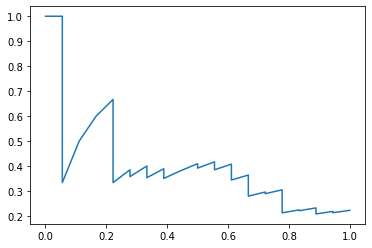

1556.0
2325.0
2429.0
1177.0
1413.0
1219.0
1218.0
1009.0
1411.0
2185.0
1115.0
2085.0
1284.0
1268.0
1128.0
1513.0
1263.0
1397.0
2273.0
2221.0
2394.0
2286.0
1144.0
1299.0
2384.0
2161.0
2108.0
1205.0
1316.0
1226.0
2305.0
1426.0
2374.0
2100.0
2269.0
1254.0
1130.0
1332.0
1201.0
1351.0
1362.0
2236.0
2003.0
2025.0
2364.0
2288.0
2187.0
2430.0
2353.0
1514.0
2167.0
1050.0
1544.0
1277.0
1417.0
2058.0
1341.0
1511.0
1350.0
2128.0
1391.0
1523.0
2448.0
2263.0
2049.0
1035.0
1112.0
2383.0
2151.0
1542.0
2209.0
1109.0
1079.0
1017.0
2216.0
1381.0
1515.0
1231.0
2029.0
1208.0
2274.0
i = 7461, roc_auc = 0.730489417989418, params = {'classifier__class_weights': [3, 1], 'classifier__depth': 5, 'classifier__l2_leaf_reg': 100, 'rfe__n_features_to_select': 50}
average_precision_score = 0.3733745726816483
pr_auc = 0.35577240349014216


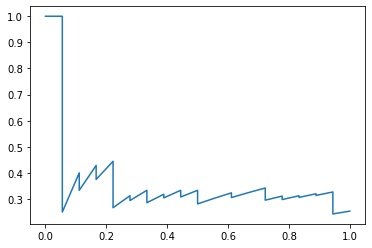

1032.0
1268.0
1139.0
2161.0
1198.0
1161.0
1320.0
2400.0
2286.0
2257.0
2372.0
1288.0
1362.0
1332.0
1228.0
2074.0
2305.0
2108.0
2442.0
2110.0
2397.0
2206.0
1561.0
1112.0
2447.0
2049.0
2288.0
1345.0
1386.0
1208.0
2023.0
2187.0
1318.0
2183.0
2297.0
1235.0
2113.0
1503.0
1089.0
2245.0
2309.0
1246.0
2233.0
2188.0
1394.0
2289.0
1256.0
1361.0
2323.0
2274.0
1301.0
2270.0
2056.0
2393.0
1166.0
2130.0
1280.0
1040.0
1426.0
2365.0
1015.0
1277.0
1505.0
1092.0
1035.0
2085.0
1215.0
2220.0
2320.0
1525.0
1348.0
1515.0
1182.0
2335.0
2080.0
2434.0
1114.0
2208.0
1017.0
1005.0
2284.0


KeyboardInterrupt: 

In [2]:
df_preprocessed, features, target_feature = load_data()

for i in range(len([1])):
    print ('\n\n\n', target_feature[i], '\n-------------------')
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features], df_preprocessed['target_binary_intrusion'],\
                                          test_size=0.25, random_state=random_state,\
                                          stratify=df_preprocessed['target_binary_intrusion'])



    for i in [random_state, random_state-195, random_state+344, random_state-347, random_state+89]:
        X_train2, X_test2, y_train, y_test = train_test_split(X, Y,  random_state=i, test_size=0.2, stratify=Y)
        cv = StratifiedKFold(6, random_state=i, shuffle=True)
        features = [i for i in features if not i == "ID"]
        X_train, X_test = X_train2[features], X_test2[features]
        X_train, X_test = cv_preprocessing(X_train, X_test, i)

        pipe = Pipeline(steps=[
        ('rfe', RFE(ExtraTreesClassifier())),
        ('classifier', CatBoostClassifier(verbose=0, random_state=i))])

        grid_params = [{
        'rfe__n_features_to_select':[50],
        'classifier__class_weights':[[3,1], [1, 15]],
        'classifier__l2_leaf_reg': [100],# 50],
        'classifier__depth': [5],#, 9]
        }]
        clf = GridSearchCV(pipe, grid_params, cv=cv, scoring='roc_auc')
        clf.fit(X_train, y_train.values.astype(int))#, fit_params = {'classifier__early_stopping_rounds':15})
        print(f"i = {i}, roc_auc = {clf.best_score_}, params = {clf.best_params_}")
        y_pred_target = clf.best_estimator_.predict_proba(X_test)[:, 1]
        
        
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred_target)
        avs = average_precision_score(y_test.astype(int), y_pred_target)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
#         for i, j in sorted(zip(y_pred_target, X_test2["ID"]), reverse=1):
#             print(j)

In [11]:
X_test2["ID"]

689    2273.0
819    2429.0
787    2374.0
191    1218.0
202    1231.0
        ...  
323    1362.0
315    1351.0
306    1341.0
100    1115.0
391    1511.0
Name: ID, Length: 81, dtype: float64

In [ ]:
df_preprocessed, features, target_feature = load_data()
df_preprocessed = df_preprocessed[~df_preprocessed['phq3'].isna()]
secondary_targets = ['PCL_Strict3',
 'target_avoidance',
 'target_hyper', 'phq3']

for i in range(len(target_feature)):
    print ('\n\n\n', target_feature[i], '\n-------------------')
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features + secondary_targets], df_preprocessed['target_intrusion'] > 8,\
                                          test_size=0.25, random_state=random_state,\
                                          stratify=df_preprocessed['target_intrusion'] > 8)



    for i in [random_state, random_state-195, random_state+344, random_state-347, random_state+89]:
        
        x_train, x_test, y_train, y_test = train_test_split(X, Y,  random_state=i, test_size=0.2, stratify=Y)
        cv = StratifiedKFold(6, random_state=i, shuffle=True)
        
        train_targets = x_train[secondary_targets]
        test_targets = x_test[secondary_targets]
    
        x_train = x_train[features]
        x_test = x_test[features]
    
        x_train, x_test = cv_preprocessing(x_train, x_test, i)

        

        lr_intrusion = CatBoostClassifier(verbose=0, random_state=random_state, class_weights=[1,7])
        lr_avoidnce = CatBoostRegressor(verbose=0, random_state=random_state)
        lr_hyper = CatBoostRegressor(verbose=0, random_state=random_state)
        lr_phq = CatBoostRegressor(verbose=0, random_state=random_state)
        lr_ptsd = CatBoostClassifier(verbose=0, random_state=random_state, class_weights=[1,14])


        #lr_intrusion.fit(x_train, np.log(train_targets['target_intrusion'] + 1))
        lr_avoidnce.fit(x_train, np.log(train_targets['target_avoidance'] + 1))
        lr_hyper.fit(x_train, np.log(train_targets['target_hyper'] + 1))
        lr_phq.fit(x_train, np.log(train_targets['phq3']+1))
        
        lr_ptsd.fit(x_train, y_train.astype(int))
        lr_intrusion.fit(x_train, (train_targets['PCL_Strict3']).astype(int))


#         intrusion = lr_intrusion.predict_proba(x_test)[:,1]
#         avoidance = lr_avoidnce.predict_proba(x_test)[:,1]
#         hyper = lr_hyper.predict_proba(x_test)[:,1]
        
        #intrusion = lr_intrusion.predict(x_test)
        avoidance = lr_avoidnce.predict(x_test)
        hyper = lr_hyper.predict(x_test)
        phq = lr_hyper.predict(x_test)
        ptsd = lr_ptsd.predict_proba(x_test)[:, 1]
        intrusion = lr_intrusion.predict_proba(x_test)[:, 1]

    
        y_pred_target = (intrusion + ptsd*4)
        
        
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred_target)
        avs = average_precision_score(y_test.astype(int), y_pred_target)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = {i}, roc_auc = {roc_auc_score(y_test.astype(int), y_pred_target)}")
#         for i, j in zip(X_train.columns, clf.best_estimator_['rfe'].ranking_):
#             if j == 1:
#                 print(i)
#         print("\n\n\n")

In [ ]:

        visible = Input(shape=(102,))
        #x = Dense(30, activation='relu')(visible)
        #x = Dropout(0.5)(x)
        #x = Dropout(0.1)(x)

        x = Dense(10, activation='relu')(visible)
        #x = Dropout(0.5)(x)
        x = Dropout(0.1)(x)
        
        outputs = [Dense(1, activation='sigmoid')(x)]
        
        for i in targets_list:
            outputs.append(Dense(1, activation='sigmoid')(x))
    

        #outputs = [output1, output2, output3, output4, output5, output6,
         #          output7, output8, output9, output10, output11,
          #         output12, output13, output14, output15, output16,
           #        output17, output18, output19, output20, output21,
            #       output22, output23, output24, output25, output26]
        
        
        model = Model(inputs=visible, outputs=outputs)
        #callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
        model.compile(loss=['binary_crossentropy']+['binary_crossentropy'] * len(targets_list),
              optimizer=Adam(), loss_weights = [1] + [1e-1] * len(targets_list))
        
        model.fit(X_train,y_trains , epochs = 250, verbose=0)
        # evaluate the model
        y_pred = (model.predict(X[features].iloc[test])[0] > lim).astype(int)


In [ ]:
df_preprocessed, features, target_feature = load_data()
df_preprocessed = df_preprocessed[~df_preprocessed['phq3'].isna()]
secondary_targets = {
    'PCL_Strict3':1,
 'target_avoidance':5,
 'target_hyper':7,
    'phq3':13
}

for j in range(len(target_feature)):
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features + list(secondary_targets.keys())], df_preprocessed['target_intrusion']>7,\
                                          test_size=0.15, random_state=random_state,\
                                          stratify=df_preprocessed['target_intrusion']>7)



    for i in [random_state, random_state-195, random_state+344, random_state-347, random_state+89]:
        x_train, x_test, y_train, y_test = train_test_split(X, Y,  random_state=i, test_size=0.2, stratify=Y)
        cv = StratifiedKFold(6, random_state=i, shuffle=True)
        y_train = [y_train]
        
        for k in secondary_targets.keys():
            y_train.append(x_train[k].apply(lambda x: int(x > secondary_targets[k])))
        
        #y_train[secondary_targets]=x_train[secondary_targets]
        x_train = x_train[features]
        x_test = x_test[features]
    
        x_train, x_test = cv_preprocessing(x_train, x_test, i)

        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        visible = Input(shape=(x_train.shape[1],))
   

        x = Dense(10, activation='relu')(visible)
        x = Dropout(0.1)(x)
        
        outputs = [Dense(1, activation='sigmoid')(x)]
        
        
        for i in secondary_targets.keys():
            outputs.append(Dense(1, activation='sigmoid')(x))
        
        
        model = Model(inputs=visible, outputs=outputs)
        #callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
        model.compile(loss=['binary_crossentropy']+['binary_crossentropy'] * len(secondary_targets.keys()),
              optimizer=Adam(), loss_weights = [1] + [1e-1] * len(secondary_targets.keys()))
        model.fit(x_train,y_train , epochs = 100, class_weight=[{0:1, 1:10}]+[{0:1,1:5}] * len(secondary_targets.keys()), verbose=0)
        # evaluate the model
        y_pred = model.predict(x_test)[0]



    
        for t in np.arange(0.1,1,0.1):
          #  print(t,'f1_score beta=0.5', precision_recall_fscore_support(y_test.astype(int), y_pred>t, beta=0.5))
           # print(t,'f1_score beta=1', precision_recall_fscore_support(y_test.astype(int), y_pred>t, beta=1))
            #print(t,'f1_score beta=2', precision_recall_fscore_support(y_test.astype(int), y_pred>t, beta=2))
            print(t,'f1_score', f1_score(y_test.astype(int), y_pred>t))

        
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred)
        avs = average_precision_score(y_test.astype(int), y_pred)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = {i}, roc_auc = {roc_auc_score(y_test.astype(int), y_pred)}")
#         for i, j in zip(X_train.columns, clf.best_estimator_['rfe'].ranking_):
#             if j == 1:
#                 print(i)
#        print("\n\n\n")

In [ ]:
df_preprocessed, features, target_feature = load_data()


In [ ]:
target_feature

In [ ]:
df_preprocessed, features, target_feature = load_data()
df_preprocessed = df_preprocessed[~df_preprocessed['phq3'].isna()]
secondary_targets = {
     'q6.1_INTRU_target':1,
 'q6.2_DREAM_target':1,
 'q6.3_FLASH_target':1,
 'q6.4_UPSET_target':1,
 'q6.5_PHYS_target':1,
 #   'PCL_Strict3':1,
# 'target_avoidance':5,
# 'target_hyper':7,
    #'phq3':13
}

In [ ]:
target_feature

In [ ]:
a = (df_preprocessed[secondary_targets.keys()] > 1).sum(axis=1) > 0

In [ ]:
b = (df_preprocessed[secondary_targets.keys()] > 1)

In [ ]:
(b.count()-b.sum())/b.sum()

In [ ]:
(a.count()-a.sum())/a.sum()

In [ ]:
df_preprocessed, features, target_feature = load_data()
df_preprocessed = df_preprocessed[~df_preprocessed['phq3'].isna()]
secondary_targets = {
     'q6.1_INTRU_target':1,
 'q6.2_DREAM_target':1,
 'q6.3_FLASH_target':1,
 'q6.4_UPSET_target':1,
 'q6.5_PHYS_target':1,
 #   'PCL_Strict3':1,
# 'target_avoidance':5,
# 'target_hyper':7,
 #   'phq3':13
}

for j in range(len(target_feature)):
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features + list(secondary_targets.keys())], df_preprocessed['target_binary_intrusion'],\
                                          test_size=0.15, random_state=random_state,\
                                          stratify=df_preprocessed['target_binary_intrusion'])



    for i in [random_state, random_state-195, random_state+344, random_state-347, random_state+89]:
        x_train, x_test, y_train, y_test = train_test_split(X, Y,  random_state=i, test_size=0.2, stratify=Y)
        cv = StratifiedKFold(6, random_state=i, shuffle=True)
        y_train = [y_train]
        
        for k in secondary_targets.keys():
            y_train.append(x_train[k].apply(lambda x: int(x > secondary_targets[k])))
        
        #y_train[secondary_targets]=x_train[secondary_targets]
        x_train = x_train[features]
        x_test = x_test[features]
    
        x_train, x_test = cv_preprocessing(x_train, x_test, i)

        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        visible = Input(shape=(x_train.shape[1],))
   

        x = Dense(10, activation='relu')(visible)
        x = Dropout(0.1)(x)
        
        outputs = [Dense(1, activation='sigmoid')(x)]
        
        
        for i in secondary_targets.keys():
            outputs.append(Dense(1, activation='sigmoid')(x))
        
        
        model = Model(inputs=visible, outputs=outputs)
        #callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
        model.compile(loss=['binary_crossentropy']+['binary_crossentropy'] * len(secondary_targets.keys()),
              optimizer=Adam(), loss_weights = [1] + [1e-1] * len(secondary_targets.keys()))
        model.fit(x_train,y_train , epochs = 100, class_weight=[{0:1, 1:2}]+[{0:1,1:3}] * len(secondary_targets.keys()), verbose=0)
        # evaluate the model
        y_pred = model.predict(x_test)[0]



    
        for t in np.arange(0.1,1,0.1):
          #  print(t,'f1_score beta=0.5', precision_recall_fscore_support(y_test.astype(int), y_pred>t, beta=0.5))
           # print(t,'f1_score beta=1', precision_recall_fscore_support(y_test.astype(int), y_pred>t, beta=1))
            #print(t,'f1_score beta=2', precision_recall_fscore_support(y_test.astype(int), y_pred>t, beta=2))
            print(t,'f1_score', f1_score(y_test.astype(int), y_pred>t))

        
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred)
        avs = average_precision_score(y_test.astype(int), y_pred)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = {i}, roc_auc = {roc_auc_score(y_test.astype(int), y_pred)}")
#         for i, j in zip(X_train.columns, clf.best_estimator_['rfe'].ranking_):
#             if j == 1:
#                 print(i)
#        print("\n\n\n")

In [ ]:
df_preprocessed, features, target_feature = load_data()


In [ ]:
df_preprocessed[features]